# Introduction

Our objective is to analyze crime data in Philadelphia from the past 10 full years (2011 - 2020).  We will be addressing the following questions:

1. What type of crime is most common in Philadelphia?
2. What time of day are certain crimes more likely to occur?
3. Over the course of the ten year time frame, how has crime changed?
    - Which crimes have become less common?
    - Which crimes have become more common?
4. Which day has the most amount of crime? The least amount of crime?
5. In which neighborhoods do the top crimes take place?
6. Which police districts have seen the greatest decrease in crime?
7. Which police districts have seen the greatest increase in crime?

## Data:

https://www.opendataphilly.org/dataset/crime-incidents


## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib import dates

In [2]:
crime_2011 = pd.read_csv("2011.csv")
crime_2012 = pd.read_csv("2012.csv")
crime_2013 = pd.read_csv("2013.csv")
crime_2014 = pd.read_csv("2014.csv")
crime_2015 = pd.read_csv("2015.csv")
crime_2016 = pd.read_csv("2016.csv")
crime_2017 = pd.read_csv("2017.csv")
crime_2018 = pd.read_csv("2018.csv")
crime_2019 = pd.read_csv("2019.csv")
crime_2020 = pd.read_csv("2020.csv")

/Users/chrischung/opt/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
crime_2011.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372


In [4]:
crime_2012.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,126,12,1,2012-06-13 21:28:00,2012-06-13,21:28:00,21,201212043124,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.91443,39.91443,-75.220592


In [5]:
crime_2013.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,107,6,1,2013-05-28 09:43:00,2013-05-28,09:43:00,9,201306025636,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441


In [6]:
crime_2014.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441


In [7]:
crime_2015.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,120,12,1,2015-01-15 08:58:00,2015-01-15,08:58:00,8,201512003444,6600 BLOCK ESSINGTON AVE,500,Burglary Non-Residential,-75.220592,39.91443,39.91443,-75.220592


In [8]:
crime_2016.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,122,12,1,2016-12-21 21:29:00,2016-12-21,21:29:00,21,201612086657,6600 BLOCK ESSINGTON AVE,300,Robbery No Firearm,-75.220592,39.91443,39.91443,-75.220592


In [9]:
crime_2017.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,124,12,1,2017-10-18 00:10:00,2017-10-18,00:10:00,0,201712078257,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.91443,39.91443,-75.220592


In [10]:
crime_2018.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,117,12,1,2018-01-06 10:56:00,2018-01-06,10:56:00,10.0,201812001185,6600 BLOCK ESSINGTON AVE,600,Thefts,-75.220592,39.91443,39.91443,-75.220592


In [11]:
crime_2019.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,13,9,1,2019-11-12 09:59:00,2019-11-12,09:59:00,9.0,201909047628,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628


In [12]:
crime_2020.head(1)

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E6100000CE175A2155CA52C0779E57C02DFB...,47,0101000020110F00009EBBEA78D5EA5FC11055888E8D8A...,22,9,2,2020-03-25 18:32:00,2020-03-25,18:32:00,18.0,202009012094,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446


Our crime_2020 dataframe has additional columns that do not match the rest of them so we will drop these columns.

In [13]:
crime_2020 = crime_2020.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator'], axis = 1)
crime_2020.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,22,9,2,2020-03-25 18:32:00,2020-03-25,18:32:00,18.0,202009012094,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446


We will now concatenate all 10 dataframes into one dataframe, called 'df'.

In [14]:
all_years = [crime_2011, crime_2012, crime_2013, crime_2014, crime_2015, crime_2016, crime_2017, crime_2018, crime_2019, crime_2020]
df = pd.concat(all_years, axis = 0, ignore_index = True)

In [15]:
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441


We'll compare the shape of each individual year's dataframe with the combined dataframe to confirm:

In [16]:
print('# rows of 2011:', crime_2011.shape[0])
print('# rows of 2012:', crime_2012.shape[0])
print('# rows of 2013:', crime_2013.shape[0])
print('# rows of 2014:', crime_2014.shape[0])
print('# rows of 2015:', crime_2015.shape[0])
print('# rows of 2016:', crime_2016.shape[0])
print('# rows of 2017:', crime_2017.shape[0])
print('# rows of 2018:', crime_2018.shape[0])
print('# rows of 2019:', crime_2019.shape[0])
print('# rows of 2020:', crime_2020.shape[0])

total_rows = crime_2011.shape[0] + \
             crime_2012.shape[0] + \
             crime_2013.shape[0] + \
             crime_2014.shape[0] + \
             crime_2015.shape[0] + \
             crime_2016.shape[0] + \
             crime_2017.shape[0] + \
             crime_2018.shape[0] + \
             crime_2019.shape[0] + \
             crime_2020.shape[0]
print('Total rows:', total_rows)

print('# rows of combined dataframe:', df.shape[0])

# rows of 2011: 187552
# rows of 2012: 186990
# rows of 2013: 176790
# rows of 2014: 176442
# rows of 2015: 174723
# rows of 2016: 159882
# rows of 2017: 157630
# rows of 2018: 153053
# rows of 2019: 161439
# rows of 2020: 139280
Total rows: 1673781
# rows of combined dataframe: 1673781


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673781 entries, 0 to 1673780
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   objectid            1673781 non-null  int64  
 1   dc_dist             1673781 non-null  int64  
 2   psa                 1673509 non-null  object 
 3   dispatch_date_time  1673781 non-null  object 
 4   dispatch_date       1673781 non-null  object 
 5   dispatch_time       1673781 non-null  object 
 6   hour_               1673776 non-null  float64
 7   dc_key              1673781 non-null  int64  
 8   location_block      1673781 non-null  object 
 9   ucr_general         1673781 non-null  int64  
 10  text_general_code   1673781 non-null  object 
 11  point_x             1673598 non-null  float64
 12  point_y             1673598 non-null  float64
 13  lat                 1673598 non-null  float64
 14  lng                 1673598 non-null  float64
dtypes: float64(5), 

Taken from https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/?view_287_per_page=25&view_287_page=1
here are the definitions of some variables that may be unclear:

- <b>dc_dist</b>: A two character field that names the District boundary.
- <b>psa</b>: A single character field that names the Police Service Area boundary.
- <b>dispatch_date_time</b>: The date and time that the officer was dispatched to the scene.
- <b>dispatch_date</b>: Dispatch date formatted as a string
- <b>dispatch_time</b>: Dispatch time formatted as a string
- <b>hour_</b>: The generalized hour of the dispatched time.
- <b>dc_key</b>: The unique identifier of the crime that consists of Year + District + Unique ID.
- <b>location_block</b>: The location of crime generalized by street block.
- <b>ucr_general</b>: The rounded crime code
- <b>text_general_code</b>: The generalized text for the crime code

In [18]:
df.isnull().sum()

objectid                0
dc_dist                 0
psa                   272
dispatch_date_time      0
dispatch_date           0
dispatch_time           0
hour_                   5
dc_key                  0
location_block          0
ucr_general             0
text_general_code       0
point_x               183
point_y               183
lat                   183
lng                   183
dtype: int64

In [19]:
# convert dates to datetime object
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [20]:
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673781 entries, 0 to 1673780
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   objectid            1673781 non-null  int64         
 1   dc_dist             1673781 non-null  int64         
 2   psa                 1673509 non-null  object        
 3   dispatch_date_time  1673781 non-null  datetime64[ns]
 4   dispatch_date       1673781 non-null  datetime64[ns]
 5   dispatch_time       1673781 non-null  object        
 6   hour_               1673776 non-null  float64       
 7   dc_key              1673781 non-null  int64         
 8   location_block      1673781 non-null  object        
 9   ucr_general         1673781 non-null  int64         
 10  text_general_code   1673781 non-null  object        
 11  point_x             1673598 non-null  float64       
 12  point_y             1673598 non-null  float64       
 13  lat         

### 1. What type of crime is most common in Philadelphia?

In [22]:
crime_types = df.groupby('text_general_code')['dc_key'].count().sort_values(ascending=False)
crime_types.head()

text_general_code
All Other Offenses             323740
Other Assaults                 236778
Thefts                         231286
Vandalism/Criminal Mischief    153002
Theft from Vehicle             134854
Name: dc_key, dtype: int64

<AxesSubplot:xlabel='dc_key', ylabel='text_general_code'>

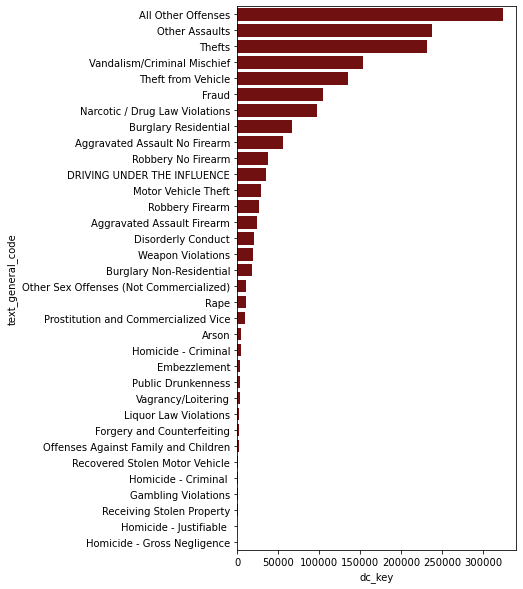

In [23]:
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(x=crime_types, y=crime_types.index, orient='h', ax = ax, color = 'maroon')

### 2. What time of day are certain crimes more likely to occur?

Let's first get a count of total crimes by hour.

line plot of time of day, multiple lines for different types of crime

In [24]:
hour_count = df.groupby('hour_')['dc_key'].count()
hour_count

hour_
0.0      71186
1.0      56022
2.0      41547
3.0      29725
4.0      19819
5.0      15722
6.0      14686
7.0      29854
8.0      58820
9.0      76186
10.0     86329
11.0     92908
12.0     92620
13.0     90869
14.0     75147
15.0     85495
16.0    109045
17.0    103727
18.0     96490
19.0     95732
20.0     91112
21.0     86094
22.0     80332
23.0     74309
Name: dc_key, dtype: int64

<AxesSubplot:xlabel='hour_', ylabel='dc_key'>

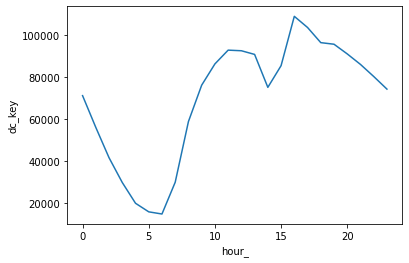

In [25]:
sns.lineplot(x = hour_count.index, y = hour_count)

The least amount of crime happens during the early morning hours, from 4-7 AM. 

The highest amount of crime takes place from 9 AM - 1 AM, with a peak at 4 PM.

Here, we will take a look at the top five crimes broken down by hour.

In [26]:
top_crime_cats = ['All Other Offenses', 'Other Assaults', 'Thefts', 'Vandalism/Criminal Mischief', 'Theft from Vehicle']

<AxesSubplot:xlabel='hour_'>

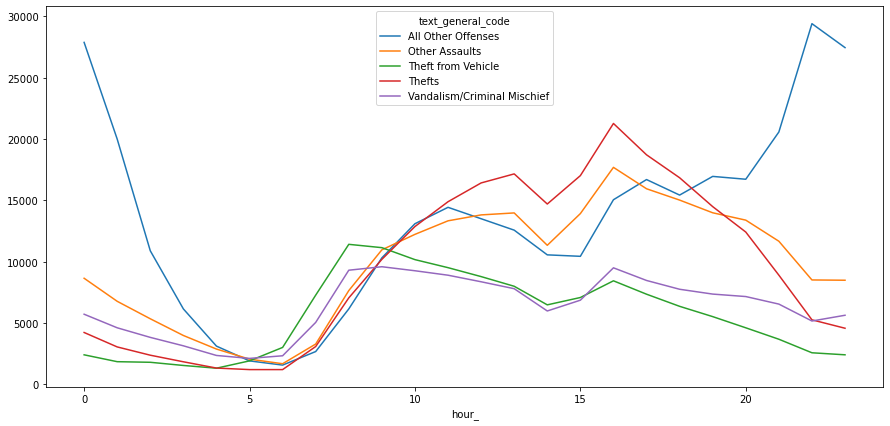

In [27]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df[df['text_general_code'].isin(top_crime_cats)].groupby(['hour_','text_general_code']).count()['dc_key'].unstack().plot(ax=ax)

Interestingly enough, while other crimes seem to decrease from 8 PM to 12 AM, crimes categorized by "All Other Offenses" is the only type of crime (out of the top five) that increases in frequency during that time period.

## 3. Over the course of the ten year time frame, how has crime changed?
a) Which crimes have become less common?

b) Which crimes have become more common?

We'll start by counting the number of crimes grouped by date and construct a time series graph.

In [28]:
date_count = df.groupby('dispatch_date')['dc_key'].count()
date_count

dispatch_date
2011-01-01    447
2011-01-02    422
2011-01-03    491
2011-01-04    515
2011-01-05    556
             ... 
2020-12-27    290
2020-12-28    402
2020-12-29    377
2020-12-30    394
2020-12-31    315
Name: dc_key, Length: 3653, dtype: int64

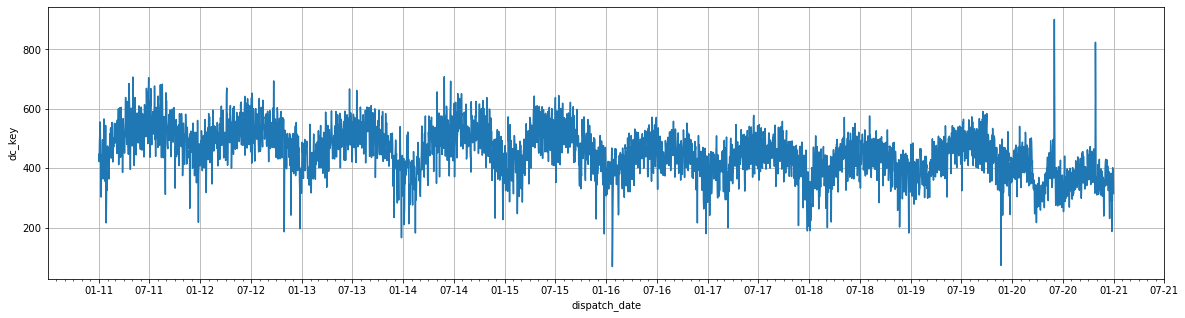

In [29]:
fig, ax = plt.subplots(figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
sns.lineplot(x = date_count.index, y = date_count, ax = ax)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

From this graph, we can see that crime rates are slowly decreasing over the past 10 years.  Interestingly enough, there are two dates in 2020 that seem to have spikes in crime.  We will identify which dates those are and investigate further later on.

Let's extract the year_month to see a slightly different visualization.

In [30]:
df['year_month'] = pd.to_datetime(df['dispatch_date']).dt.to_period('M')
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,year_month
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372,2011-09
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378,2011-11
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446,2011-06
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084,2011-07
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441,2011-06


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673781 entries, 0 to 1673780
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   objectid            1673781 non-null  int64         
 1   dc_dist             1673781 non-null  int64         
 2   psa                 1673509 non-null  object        
 3   dispatch_date_time  1673781 non-null  datetime64[ns]
 4   dispatch_date       1673781 non-null  datetime64[ns]
 5   dispatch_time       1673781 non-null  object        
 6   hour_               1673776 non-null  float64       
 7   dc_key              1673781 non-null  int64         
 8   location_block      1673781 non-null  object        
 9   ucr_general         1673781 non-null  int64         
 10  text_general_code   1673781 non-null  object        
 11  point_x             1673598 non-null  float64       
 12  point_y             1673598 non-null  float64       
 13  lat         

In [32]:
df['year_month'] = df['year_month'].astype(str)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673781 entries, 0 to 1673780
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   objectid            1673781 non-null  int64         
 1   dc_dist             1673781 non-null  int64         
 2   psa                 1673509 non-null  object        
 3   dispatch_date_time  1673781 non-null  datetime64[ns]
 4   dispatch_date       1673781 non-null  datetime64[ns]
 5   dispatch_time       1673781 non-null  object        
 6   hour_               1673776 non-null  float64       
 7   dc_key              1673781 non-null  int64         
 8   location_block      1673781 non-null  object        
 9   ucr_general         1673781 non-null  int64         
 10  text_general_code   1673781 non-null  object        
 11  point_x             1673598 non-null  float64       
 12  point_y             1673598 non-null  float64       
 13  lat         

In [34]:
year_month_count = df.groupby('year_month')['dc_key'].count()
year_month_count

year_month
2011-01    13131
2011-02    13226
2011-03    16034
2011-04    16254
2011-05    16722
           ...  
2020-08    11419
2020-09    11704
2020-10    13175
2020-11    10616
2020-12    10847
Name: dc_key, Length: 120, dtype: int64

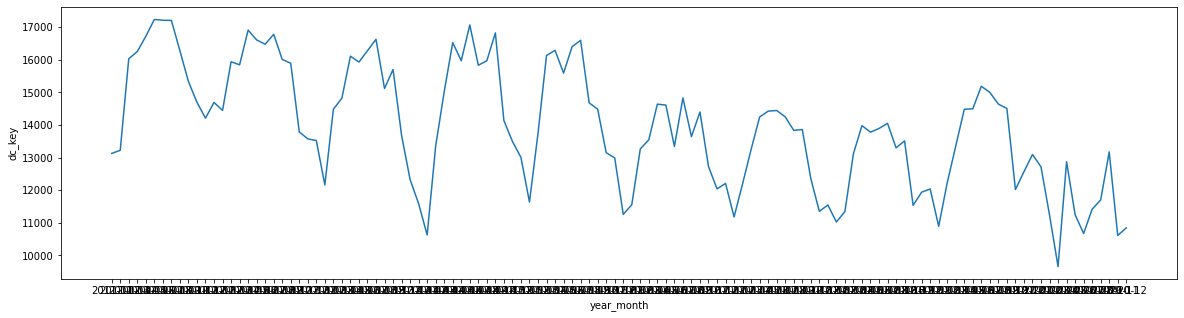

In [35]:
fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(x = year_month_count.index, y = year_month_count, ax = ax)

plt.show()

In [36]:
df['year'] = df['dispatch_date'].dt.year
df['month'] = df['dispatch_date'].dt.month
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,year_month,year,month
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372,2011-09,2011,9
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378,2011-11,2011,11
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446,2011-06,2011,6
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084,2011-07,2011,7
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441,2011-06,2011,6


Let's look at the number of crimes within each year for all of the 10 years.

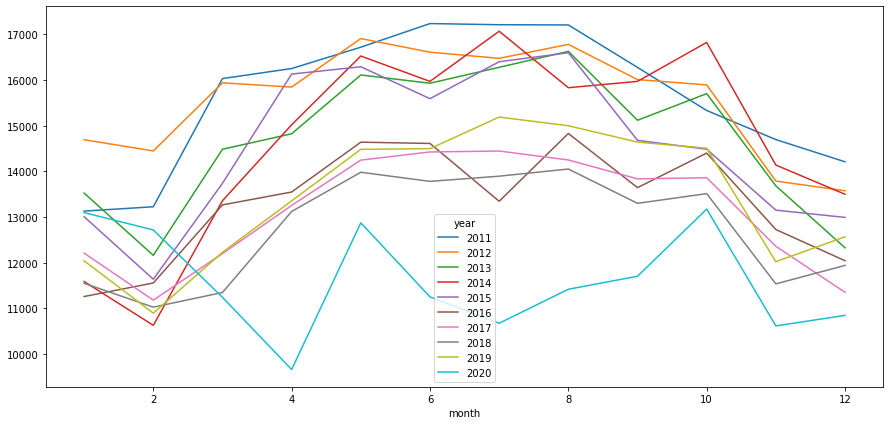

In [37]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['month','year']).count()['dc_key'].unstack().plot(ax=ax)
plt.show()

In general, there seems to be a seasonality to crime, with the highest numbers taking place during warmer months (June, July, August) and the lowest numbers taking place during colder months (December, January, February).

In most years, crime rates pick up again starting in March. Interestingly enough, for the year 2020, crime rates severely decreased in March and April.  Most likely, this is due to the city-wide lockdown to prevent the spread of COVID-19.

## 4. Which days have the highest number of of crimes? The lowest number of crimes?

In [38]:
date_count.nlargest(5)

dispatch_date
2020-06-01    901
2020-10-27    824
2014-05-28    708
2011-05-03    707
2011-06-29    705
Name: dc_key, dtype: int64

In [39]:
df[df['dispatch_date']=='2020-06-01']['text_general_code'].value_counts()

Burglary Non-Residential                   420
Vandalism/Criminal Mischief                143
All Other Offenses                          70
Other Assaults                              38
Motor Vehicle Theft                         36
Theft from Vehicle                          26
Aggravated Assault No Firearm               24
Aggravated Assault Firearm                  22
Thefts                                      21
Weapon Violations                           16
Fraud                                       14
Recovered Stolen Motor Vehicle              14
Robbery No Firearm                          10
Arson                                        9
Robbery Firearm                              9
Burglary Residential                         7
Disorderly Conduct                           6
Homicide - Criminal                          5
DRIVING UNDER THE INFLUENCE                  4
Narcotic / Drug Law Violations               3
Rape                                         2
Other Sex Off

In [40]:
df[df['dispatch_date']=='2020-10-27']['text_general_code'].value_counts()

Burglary Non-Residential                   279
Vandalism/Criminal Mischief                101
Thefts                                      67
Aggravated Assault No Firearm               67
Other Assaults                              54
Theft from Vehicle                          41
Motor Vehicle Theft                         38
Aggravated Assault Firearm                  31
All Other Offenses                          31
Fraud                                       26
Weapon Violations                           18
Robbery Firearm                             18
Robbery No Firearm                          13
Homicide - Criminal                         10
Burglary Residential                         9
Narcotic / Drug Law Violations               5
Rape                                         4
Arson                                        4
Disorderly Conduct                           4
Offenses Against Family and Children         2
Other Sex Offenses (Not Commercialized)      2
Name: text_ge

The two days with the highest amount of crime in are 2020-06-01 and 2020-10-27. After further research, we find that there is significance in these two dates in the city of Philadelphia.

On May 25, 2020, George Floyd was murdered by a police officer, Derek Chauvin in Minneapolis, MN.  Protests in Philadelphia began the next day and lasted for multiple days with its peak on <b>June 1, 2020</b>. During a large demonstration, hundreds of protesters split off from a group and walked onto the interstate 676, at which point a SWAT team appeared and began firing rubber bullets and tear gas into the crowd.  Looting and vandalism continued in Center City and other parts of Philadelphia.

On October 25, 2020, Walter Wallace Jr was shot and killed by Philadelphia police officers. After gaining attention from a cellphone video that was posted and went viral, protests and demonstrations took place across Philadelphia throughout late October.  On the night of October 26 into the morning of <b>October 27</b>, protesters marched through West Philadelphia and the police began to clash with demonstrators.  The violence and unrest spread to other parts of Philadelphia, with the police reporting that there were allegedly 1,000 people looting businesses in the Port Richmond neighborhood of Philadelphia.


<i>Source:</i> \
https://en.wikipedia.org/wiki/George_Floyd_protests_in_Philadelphia
https://en.wikipedia.org/wiki/Killing_of_Walter_Wallace

In [41]:
date_count.nsmallest(15)

dispatch_date
2016-01-23     69
2019-11-22     73
2016-01-24    149
2013-12-25    166
2015-12-25    179
2016-12-25    180
2014-02-13    182
2018-12-25    182
2012-10-29    186
2020-12-25    187
2017-12-25    189
2018-01-04    190
2012-12-25    196
2017-03-14    199
2018-03-07    200
Name: dc_key, dtype: int64

The following are the dates with the lowest number of crimes:

On <b>January 23, 2016</b> a powerful winter storm dumped over 20 inches of snow in many places, which most likely contributed to low number of crime that day.




Source:
https://www.inquirer.com/philly/news/local/20160124_Philadelphia_January_2016_blizzard_updates.html